# Figure 6

### Set-up

In [1]:
import cobra, libsbml, collections, math
import pandas as pd
from cobrafunctions.buildingediting import *
from cobrafunctions.analysing import *
from cobrafunctions.adjustedcobrafunctions import *
from tqdm import tqdm_notebook as tqdm

savelocation, inputlocation = nameexperiment("figure6") # Set name for files

model = cobra.io.sbml.read_sbml_model("Inputs/4_stage_GC.xml")

model = constrainmaintenance(model) #add maintenance

cobra\__init__.py:33 FutureWarning: Python 2 is reaching end of life (see https://www.python.org/dev/peps/pep-0373/) and many cobra dependencies have already dropped support. At the moment it *should* still work but we will no longer actively maintain Python 2 support.


This experiment already exists, continue and overwrite?y
OK, Continuing and overwriting experiment


No handlers could be found for logger "cobra.io.sbml"


# Figure 6

In [2]:
realisticmodel = model.copy()

In [3]:
constraints = [124, 454, 200, 200, 200, 464]
scalingfactor = 1.2
osmolytestoconstrain = ["Cl", "K", "SUCROSE", "FRU", "GLC", "MAL"]
osmolarity = ((((2.5*math.exp(0.16*(17)))*((((17)*200+4000)*17.2*10**-8)-((33*(10**-6))+(565*(10**3)*(0)))))/(0.082*293))*10**3)
totalosmo = 0
for i, osmolyte in enumerate(osmolytestoconstrain):
    if osmolyte == "MAL":
        setflux(realisticmodel, osmolyte + "_c_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.1, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_v_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.9*0.7, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, "a" + osmolyte + "_v_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.9*0.3, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_c_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.1, multi = False) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_v_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.9*0.7, multi = False) #constrain max cytosolic chloride
        setflux(realisticmodel, "a" + osmolyte + "_v_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.9*0.3, multi = False) #constrain max cytosolic chloride
    else:
        setflux(realisticmodel, osmolyte + "_c_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.1, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_v_gc_Linker", 0, (constraints[i]*scalingfactor)*(6*200+4000)*17.2*(10.0**(-8.0))*0.9, multi = True) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_c_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.1, multi = False) #constrain max cytosolic chloride
        setflux(realisticmodel, osmolyte + "_v_gc_Linker_2", 0, (constraints[i]*scalingfactor)*(17*200+4000)*17.2*(10.0**(-8.0))*0.9, multi = False) #constrain max cytosolic chloride
    print "Max " + osmolyte + " constrained to " + str(round(constraints[i]*10**(-3)*1.1, 3)) + "M (" + str(round((constraints[i])*(17*200+4000)*17.2*(10.0**(-8.0)),3)) + "), " + str(round(constraints[i]*10**(-3)/osmolarity*100)) + "% of total osmolarity required" 
    totalosmo = totalosmo + constraints[i]*scalingfactor*10**(-3)
print "Constraints can account for %s percent of total osmolarity" % (round(totalosmo/osmolarity*100,))

apertureconstraint = [6,17,6,6]
realisticmodel = constrainaperture(realisticmodel, apertureconstraint) #constrain open aperture
print "Aperture constrained to:" + str(apertureconstraint)

Max Cl constrained to 0.136M (0.158), 6.0% of total osmolarity required
Max K constrained to 0.499M (0.578), 23.0% of total osmolarity required
Max SUCROSE constrained to 0.22M (0.255), 10.0% of total osmolarity required
Max FRU constrained to 0.22M (0.255), 10.0% of total osmolarity required
Max GLC constrained to 0.22M (0.255), 10.0% of total osmolarity required
Max MAL constrained to 0.51M (0.591), 24.0% of total osmolarity required
Constraints can account for 101.0 percent of total osmolarity
Aperture constrained to:[6, 17, 6, 6]


Running pFBA
Setting SOF model
Running FVA



Processing results


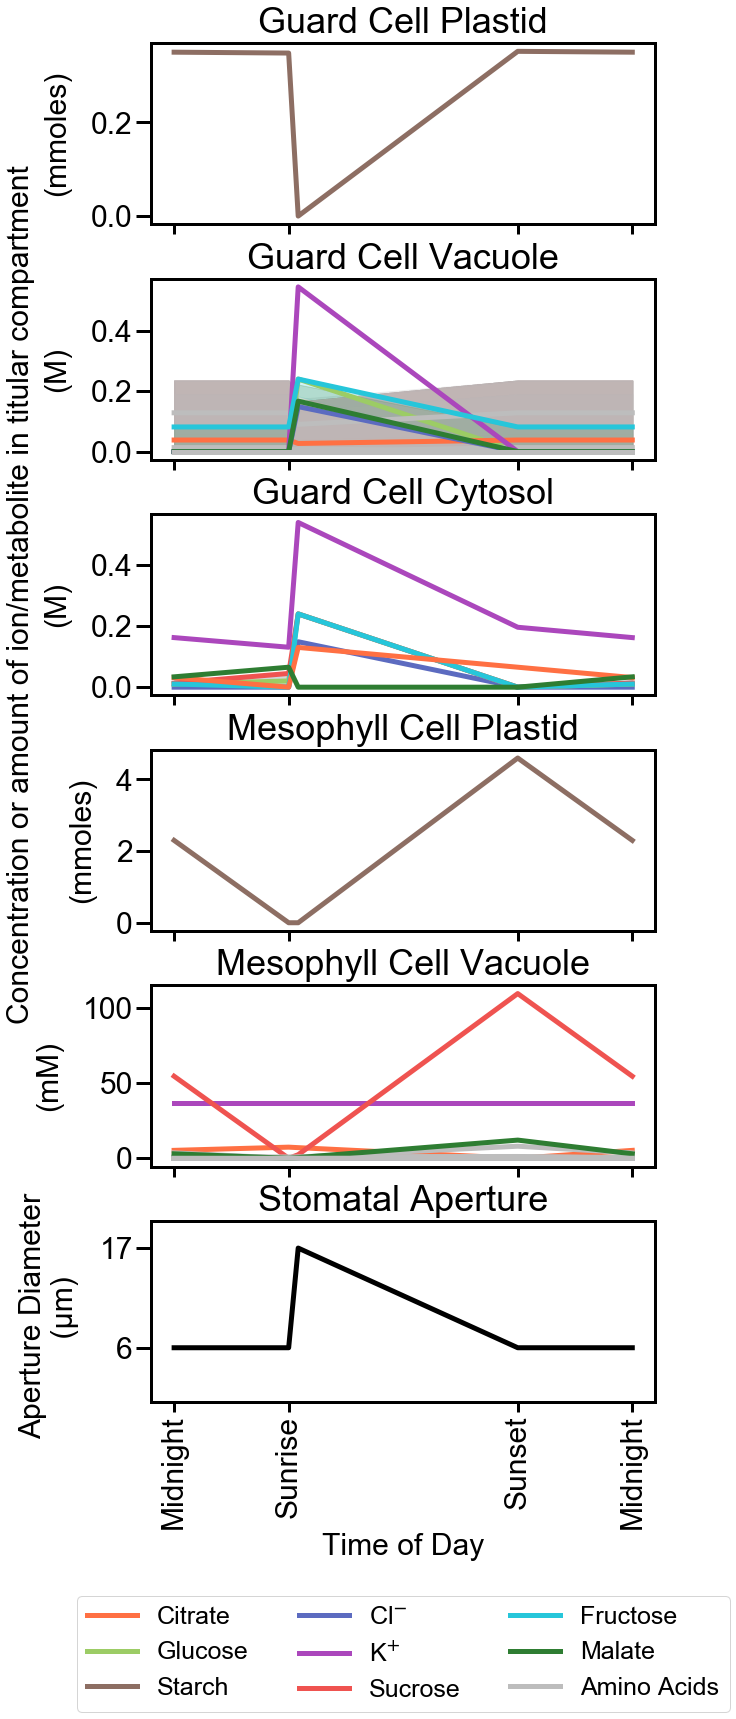

In [4]:
realisticmodel, realisticmodelfig = linkersplotfrommodel(realisticmodel)

In [5]:
starchknockoutmodel = realisticmodel.copy()

In [6]:
setflux(starchknockoutmodel, "STARCH_p_gc_Linker", 0, 0, multi = True)

Name,TomCoreOxford
Memory address,0x03b2fbcf8
Number of metabolites,6394
Number of reactions,7061
Number of groups,0
Objective expression,0
Compartments,"a, p_me, Cytoplasm, Biomass, Extracellular, Mitochondrion innermembrane interacting with inter membrane space, Mitochondrial intermembrane space, Mitochondrion innermembrane interacting with cristal space, v_gc, Mitochondrion, Thylakoid, c_gc, v_me, c_me, Plastid, Endoplasmic reticulum, Pool, Vacuole, Peroxisome, p_gc, pseudo"


Running pFBA
Setting SOF model
Running FVA



Processing results


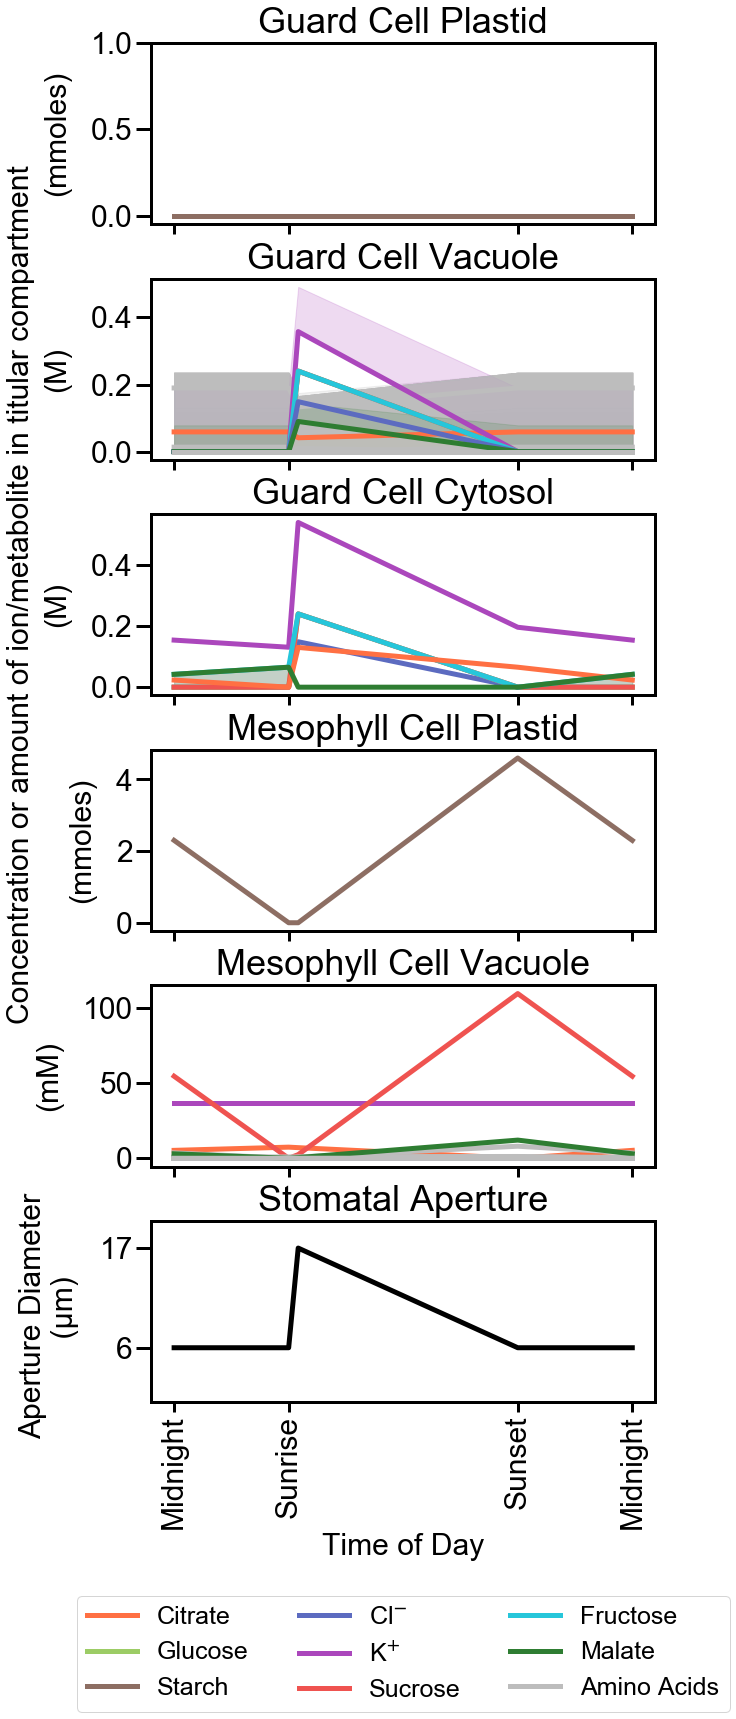

In [7]:
starchknockoutmodel, starchknockoutmodelfig = linkersplotfrommodel(starchknockoutmodel)

In [8]:
realisticsucfracmeso =  -realisticmodel.reactions.SUCROSE_ae_me_2.flux/realisticmodel.reactions.SUCROSE_PROTON_ec_gc_2.flux
realisticglcfracstarch = realisticmodel.reactions.GLC_PROTON_rev_cv_gc_2.flux/(realisticmodel.reactions.GLC_PROTON_rev_cv_gc_2.flux+realisticmodel.reactions.RXN_1461_v_gc_2.flux)

In [9]:
print realisticsucfracmeso
print realisticglcfracstarch

0.827054806234
0.528663533213


In [10]:
realisticglcfromstarch_v = realisticglcfracstarch*(realisticmodel.reactions.GLC_v_gc_Linker_2.flux-realisticmodel.reactions.GLC_v_gc_Linker_1.flux)
realisticglcfrommeso_v = (1-realisticglcfracstarch)*realisticsucfracmeso*(realisticmodel.reactions.GLC_v_gc_Linker_2.flux-realisticmodel.reactions.GLC_v_gc_Linker_1.flux)
realisticglcfromapo_v = (1-realisticglcfracstarch)*(1-realisticsucfracmeso)*(realisticmodel.reactions.GLC_v_gc_Linker_2.flux-realisticmodel.reactions.GLC_v_gc_Linker_1.flux)
realisticfrufrommeso_v = realisticsucfracmeso*(realisticmodel.reactions.FRU_v_gc_Linker_2.flux-realisticmodel.reactions.FRU_v_gc_Linker_1.flux)
realisticfrufromapo_v = (1-realisticsucfracmeso)*(realisticmodel.reactions.FRU_v_gc_Linker_2.flux-realisticmodel.reactions.FRU_v_gc_Linker_1.flux)
realisticsucfromapo_c = (1-realisticsucfracmeso)*(realisticmodel.reactions.SUCROSE_c_gc_Linker_2.flux-realisticmodel.reactions.SUCROSE_c_gc_Linker_1.flux)
realisticsucfrommeso_c = realisticsucfracmeso*(realisticmodel.reactions.SUCROSE_c_gc_Linker_2.flux-realisticmodel.reactions.SUCROSE_c_gc_Linker_1.flux)
realisticcitfromstarch_c = (0.04/0.18)*(realisticmodel.reactions.CIT_c_gc_Linker_2.flux-realisticmodel.reactions.CIT_c_gc_Linker_1.flux)
realisticcitfromother_c = (0.14/0.18)*(realisticmodel.reactions.CIT_c_gc_Linker_2.flux-realisticmodel.reactions.CIT_c_gc_Linker_1.flux)                                    

In [11]:
knockoutsucfracmeso = -starchknockoutmodel.reactions.SUCROSE_ae_me_2.flux/starchknockoutmodel.reactions.SUCROSE_PROTON_ec_gc_2.flux

In [12]:
knockoutfrufrommeso_v = knockoutsucfracmeso*(starchknockoutmodel.reactions.FRU_v_gc_Linker_2.flux-starchknockoutmodel.reactions.FRU_v_gc_Linker_1.flux)
knockoutfrufromapo_v = (1-knockoutsucfracmeso)*(starchknockoutmodel.reactions.FRU_v_gc_Linker_2.flux-starchknockoutmodel.reactions.FRU_v_gc_Linker_1.flux)
knockoutglcfromapo_v = (1-knockoutsucfracmeso)*(starchknockoutmodel.reactions.GLC_v_gc_Linker_2.flux-starchknockoutmodel.reactions.GLC_v_gc_Linker_1.flux)
knockoutglcfrommeso_v = knockoutsucfracmeso*(starchknockoutmodel.reactions.GLC_v_gc_Linker_2.flux-starchknockoutmodel.reactions.GLC_v_gc_Linker_1.flux)
knockoutsucfromapo_v = (1-knockoutsucfracmeso)*(starchknockoutmodel.reactions.SUCROSE_v_gc_Linker_2.flux-starchknockoutmodel.reactions.SUCROSE_v_gc_Linker_1.flux)
knockoutsucfrommeso_v = knockoutsucfracmeso*(starchknockoutmodel.reactions.SUCROSE_v_gc_Linker_2.flux-starchknockoutmodel.reactions.SUCROSE_v_gc_Linker_1.flux)
knockoutsucfromapo_c = (1-knockoutsucfracmeso)*(starchknockoutmodel.reactions.SUCROSE_c_gc_Linker_2.flux-starchknockoutmodel.reactions.SUCROSE_c_gc_Linker_1.flux)
knockoutsucfrommeso_c = knockoutsucfracmeso*(starchknockoutmodel.reactions.SUCROSE_c_gc_Linker_2.flux-starchknockoutmodel.reactions.SUCROSE_c_gc_Linker_1.flux)
knockoutcitfromapo_c = (1./3)*(starchknockoutmodel.reactions.CIT_c_gc_Linker_2.flux-starchknockoutmodel.reactions.CIT_c_gc_Linker_1.flux)
knockoutcitfromother_c = (2./3)*(starchknockoutmodel.reactions.CIT_c_gc_Linker_2.flux-starchknockoutmodel.reactions.CIT_c_gc_Linker_1.flux)

**NB** The values used for ATP production in figure 6B were calculated in an excel spreadsheet, which can be found in \Results\figure6\energycomparison.xlsx

Realistic model osmolyte total: 1.73899879091, osmolarity constraint: 1.72426206787
Starch model osmolyte total: 1.74084088092, osmolarity constraint: 1.72426206787


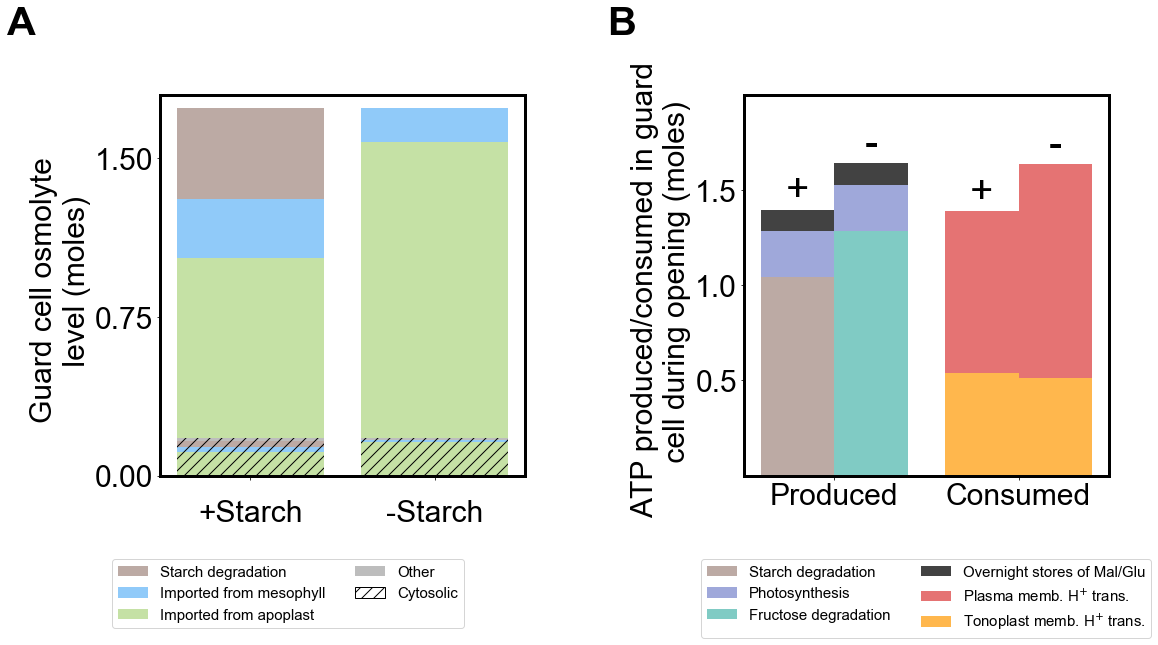

In [13]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1,2, figsize = (17,7))

plt.rcParams['axes.linewidth'] = 3
plt.rcParams['font.size'] = 25
plt.rcParams['axes.labelsize'] = 25

plt.sca(ax[0])

linkersdict = {}
for reaction in realisticmodel.reactions:
    if "v_gc_Linker_2" in reaction.id:
        if abs(reaction.flux-realisticmodel.reactions.get_by_id(reaction.id[:-1] + "1").flux) > 0.00001:
            linkersdict[reaction.id] = reaction.flux-realisticmodel.reactions.get_by_id(reaction.id[:-1] + "1").flux
            
gcvolume = (17*200+4000)*17.2*(10.0**(-8.0))

pienames = ["Imported from apoplast_c", "Imported from mesophyll_c", "Starch degradation_c", "Other_c",  "Imported from apoplast_v", "Imported from mesophyll_v","Starch degradation_v", "Other_v"]
realisticpiekeys = [["FRU_c_gc_Linker_2", "K_c_gc_Linker_2", "Cl_c_gc_Linker_2",realisticsucfromapo_c], [realisticsucfrommeso_c],["GLC_c_gc_Linker_2", realisticcitfromstarch_c],[knockoutcitfromother_c], ["K_v_gc_Linker_2", "Cl_v_gc_Linker_2",realisticfrufromapo_v,realisticglcfromapo_v],[realisticglcfrommeso_v,realisticfrufrommeso_v],[ realisticglcfromstarch_v, "MAL_v_gc_Linker_2", "aMAL_v_gc_Linker_2", "SER_v_gc_Linker_2"],[]]
starchknockoutpiekeys = [[knockoutsucfromapo_c,"FRU_c_gc_Linker_2", "K_c_gc_Linker_2", "Cl_c_gc_Linker_2", "GLC_c_gc_Linker_2",knockoutcitfromapo_c],[knockoutsucfrommeso_c], [],[knockoutcitfromother_c], ["K_v_gc_Linker_2", "Cl_v_gc_Linker_2", "MAL_v_gc_Linker_2", "aMAL_v_gc_Linker_2",knockoutsucfromapo_v,knockoutfrufromapo_v,knockoutglcfromapo_v, "SER_v_gc_Linker_2"],[knockoutfrufrommeso_v,knockoutglcfrommeso_v,knockoutsucfrommeso_v],[],[]]
realisticpievalues = []
starchknockoutpievalues = []
for index, name in enumerate(pienames):
    realisticosmolytesum = 0
    starchknockoutosmolytesum = 0
    for key in realisticpiekeys[index]:
        if type(key) == str:
            realisticosmolytesum = realisticosmolytesum + (realisticmodel.reactions.get_by_id(key).flux-realisticmodel.reactions.get_by_id(key[:-1] + "1").flux)
        else:
            realisticosmolytesum = realisticosmolytesum + key
    for key in starchknockoutpiekeys[index]:
        if type(key) == str:
            starchknockoutosmolytesum = starchknockoutosmolytesum + (starchknockoutmodel.reactions.get_by_id(key).flux-starchknockoutmodel.reactions.get_by_id(key[:-1] + "1").flux)
        else:
            starchknockoutosmolytesum = starchknockoutosmolytesum + key
    realisticpievalues.append(realisticosmolytesum)
    starchknockoutpievalues.append(starchknockoutosmolytesum)

#test if all osmolarity is accounted for
realisticosmoyltetotal = 0
for compartment in realisticpievalues:
    realisticosmoyltetotal = realisticosmoyltetotal + compartment
print "Realistic model osmolyte total: " + str(realisticosmoyltetotal) + ", osmolarity constraint: " + str((realisticmodel.reactions.pseudoOs_constraint_gc_2.flux-realisticmodel.reactions.pseudoOs_constraint_gc_1.flux))

starchosmoyltetotal = 0
for compartment in starchknockoutpievalues:
    starchosmoyltetotal = starchosmoyltetotal + compartment
print "Starch model osmolyte total: " + str(starchosmoyltetotal) + ", osmolarity constraint: " + str((starchknockoutmodel.reactions.pseudoOs_constraint_gc_2.flux-starchknockoutmodel.reactions.pseudoOs_constraint_gc_1.flux))

coloursdict = {
            'Starch degradation': '#bcaaa4',
            'Imported from apoplast': '#c5e1a5',
            'Imported from mesophyll': '#90caf9',
            'Other': '#bdbdbd'
         }

for i, model in enumerate([realisticpievalues, starchknockoutpievalues]):
    bottom = 0
    for j, value in enumerate(model):
        hatch = ""
        if pienames[j][-1:] == "c":
            hatch = "//"
        plt.bar(i, value, bottom=bottom, color = coloursdict[pienames[j][:-2]], hatch = hatch)
        bottom = bottom + value

plt.xticks([0,1], ["+Starch","-Starch"])
plt.tick_params(axis='x', which='major', pad=20)

from matplotlib.lines import Line2D
legendnames = []
legendpatches = []
colourslist = ['Starch degradation', 'Imported from mesophyll','Imported from apoplast', 'Other']
for source in colourslist:
    legendpatches.append(Patch(facecolor=coloursdict[source]))
    legendnames.append(source)
legendnames.append("Cytosolic")
legendpatches.append(Patch(facecolor="white", edgecolor = "black", hatch = "//"))
plt.legend(legendpatches, legendnames, loc = 'upper center', bbox_to_anchor=(0.35, -0.2), ncol = 2, prop={'size': 15}) 
plt.ylim(0,1.8)
plt.yticks([0,0.75,1.5])

plt.ylabel("Guard cell osmolyte \n level (moles)")

plt.sca(ax[1])

realisticnames = ["ATP starch degradation", "ATP photosynthesis", "Starch Carbon for CIT"]
realisticpiekeys = [1.042064275, 0.243583, 0.111950254]
starchknockoutnames = ["ATP fructose degradation","ATP photosynthesis", "Fructose carbon for CIT"]
starchknockoutpiekeys = [1.284945392, 0.243583, 0.111950254]    

coloursdict = {
            "ATP starch degradation": '#bcaaa4',
            "ATP photosynthesis": '#9fa8da',
            "ATP fructose degradation": '#80cbc4',
            "Starch Carbon for CIT": '#424242',
            "Fructose carbon for CIT": '#424242'
         }

heights = []

for i, sourcename in zip([0,1], [realisticnames, starchknockoutnames]):
    bottom = 0
    if i == 0:
        width = -0.4
    else:
        width = 0.4
    for j, value in enumerate([realisticpiekeys, starchknockoutpiekeys][i]):
        producedbars = plt.bar("Produced", value, width = width, bottom=bottom, color=coloursdict[sourcename[j]], align = 'edge')
        bottom = bottom + value
        if j == len([realisticpiekeys, starchknockoutpiekeys][i])-1:
            heights.append(bottom)

plt.yticks([0.5,1.0,1.5])
plt.ylim(ymax=2)
plt.ylabel("ATP produced/consumed in guard \n cell during opening (moles)")
fig.text(0, 1, "A", size = 40, weight = "bold")
fig.text(0.49, 1, "B", size = 40, weight = "bold")

for i, modelname in zip([0,1],[realisticmodel, starchknockoutmodel]):
    bottom = 0
    for k, reaction, colour in zip([0,3],["PROTONATP_rev_vc_gc_2", "PROTON_ATPase_c_gc_2", "ATPase_tx_gc_2", "UDPKIN_RXN_c_gc_2"],["#ffb74d", "#e57373", "green", "blue"]):
        width = -0.4
        if i == 1:
            width = 0.4
        consumedbars = plt.bar("Consumed", modelname.reactions.get_by_id(reaction).flux*0.5, bottom=bottom, width = width, color=colour, align = "edge")
        bottom = bottom + modelname.reactions.get_by_id(reaction).flux*0.5
        if k == 3:
            heights.append(bottom)

for x, y, starch in zip([-0.2,0.2,0.8,1.2], heights, ["+","-","+","-"]):
    plt.text(x, y, starch, ha='center', va='bottom', size = '40')

from matplotlib.lines import Line2D
legendnames = ["Starch degradation", "Photosynthesis", "Fructose degradation", "Overnight stores of Mal/Glu", r"Plasma memb. H$^{+}$ trans.",r"Tonoplast memb. H$^{+}$ trans."]
colors = ['#bcaaa4', '#9fa8da', '#80cbc4', '#424242', "#e57373", "#ffb74d"]
legendpatches = []
for name in colors:
    legendpatches.append(Patch(facecolor=name))
plt.legend(legendpatches, legendnames, loc = 'upper center', bbox_to_anchor=(0.5, -0.2), ncol = 2, prop={'size': 15})
#plt.text(-0.2, -0.8, r"$^{*}$Excluding ATP Synthase", size = 17, weight = "bold")

fig.subplots_adjust(wspace = 0.6)#, left=0.2)

fig.savefig(os.path.join(savelocation, "figure6.png"), format='png',  bbox_inches='tight', dpi=1200)
fig.savefig(os.path.join(savelocation, "figure6.svg"), format='svg',  bbox_inches='tight')

In [14]:
#c, v
#apoplast, mesophyll, starch, other
for i, model in enumerate([realisticpievalues, starchknockoutpievalues]):
    print "\n"
    for j, value in enumerate(model):
        print str(value/realisticosmoyltetotal*100) + "% of total guard cell osmolyte level"



6.38556406407% of total guard cell osmolyte level
1.26148983587% of total guard cell osmolyte level
1.86323838514% of total guard cell osmolyte level
0.635569290494% of total guard cell osmolyte level
49.0586065856% of total guard cell osmolyte level
16.1136440758% of total guard cell osmolyte level
24.681887763% of total guard cell osmolyte level
0.0% of total guard cell osmolyte level


9.27329575009% of total guard cell osmolyte level
0.342924713451% of total guard cell osmolyte level
0.0% of total guard cell osmolyte level
0.635569290494% of total guard cell osmolyte level
80.5951711767% of total guard cell osmolyte level
9.25896726317% of total guard cell osmolyte level
0.0% of total guard cell osmolyte level
0.0% of total guard cell osmolyte level


In [15]:
print 24.681887763/90*100, "- contribution of starch to vacuolar osmotica"
print 1.86323838514/10*100, "- contribution of starch to cytosolic osmotica"
print 24.681887763+1.86323838514, "- contribution of starch to total osmotica"

27.4243197367 - contribution of starch to vacuolar osmotica
18.6323838514 - contribution of starch to cytosolic osmotica
26.5451261481 - contribution of starch to total osmotica


In [16]:
print 6.38556406407+49.0586065856, "- contribution of apoplast to osmotica"
print 16.1136440758+1.26148983587, "- contribution of mesophyll to osmotica"

55.4441706497 - contribution of apoplast to osmotica
17.3751339117 - contribution of mesophyll to osmotica


In [17]:
for i, sourcename in zip([0,1], [realisticnames, starchknockoutnames]):
    for j, energytype in enumerate(sourcename):
        bottom = 0
        for k, value in enumerate(values[i][j]):
            print value
        print "\n"
    print "\n"

NameError: name 'values' is not defined

In [ ]:
#proportion of energy coming from starch
print "ATP: " + str(0.272068182631/(0.272068182631+0.07425)*100) + "%"
print "NADH: " + str(0.538662890104/(0.538662890104+0.05775)*100) + "%"

In [ ]:
#proportion of energy coming from PS
print "ATP: " + str(0.07425/(0.272068182631+0.07425)*100) + "%"
print "NADH: " + str(0.05775/(0.538662890104+0.05775)*100) + "%"

In [ ]:
#overall increase in ATP consumption
(starchknockoutmodel.reactions.get_by_id("PROTONATP_rev_vc_gc_2").flux + starchknockoutmodel.reactions.get_by_id("PROTON_ATPase_c_gc_2").flux)/(realisticmodel.reactions.get_by_id("PROTONATP_rev_vc_gc_2").flux + realisticmodel.reactions.get_by_id("PROTON_ATPase_c_gc_2").flux)*100

In [ ]:
models = ["+starch", "-starch"]
for i, sourcename in zip([0,1], [realisticnames, starchknockoutnames]):
    for j, energytype in enumerate(sourcename):
        for k, value in enumerate(values[i][j]):
            print models[i], energytype[k], value

In [ ]:
print ("% of ATP from PS:")
print (0.00257142857143/(0.00257142857143+0.0128051574356+0.257514726154)*100)
print ("% of NADH from PS:")
print (0.006/(0.006+0.828627040303)*100)

Calculating the carbon cost to the mesophyll

In [ ]:
realisticcarbontransfer = (realisticmodel.reactions.SUCROSE_ae_me_2.flux*2)*0.5+realisticmodel.reactions.GLC_ae_me_3.flux*11.5

In [ ]:
knockoutcarbontransfer = (starchknockoutmodel.reactions.SUCROSE_ae_me_2.flux*2)*0.5+starchknockoutmodel.reactions.GLC_ae_me_3.flux*11.5

In [ ]:
knockoutcarbontransfer/realisticcarbontransfer